# Aufgabe 1)


In [5]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy import integrate

## Teilaufgabe a)
Zu erzeugen sind gleichverteilte Zufallszahlen im Intervall von $x_\text{min}$ bis $x_\text{max}$. Dazu darf ein Zufallszahlengenerator verwendet werden, der gleichverteilte Zufallszahlen zwischen 0 und 1 erzeugt. Es wird eine lineare Transformation durchgeführt, bei der die 0 auf $x_\text{min}$ und 1 auf $x_\text{max}$ abgebildet wird. Es ist ersichtlich, dass die Gleichverteilungseigenschaft erhalten bleibt. Es ergibt sich die Transformation
$$
f(x) = (x_\text{max}-x_\text{min})x + x_\text{min}\,,
$$
wobei $x$ aus den ursprünglichen Zahlen stammt und $f(x)$ im neuen Intervall gleichverteilt ist.
Der Generator ist im Folgenden implementiert. Das Histogrammieren zeigt, da sich in Näherung der Anzahl an transformierten Samples eine Gleichverteilung ergibt.

In [6]:
# Definiere einige Funktionen auch schon für spaeter
def uniformTransform(x, x_min, x_max):
    return (x_max - x_min) * x + x_min

func = lambda x: x**(-n)
def powerLawPdf(x, x_min, x_max):
    return  1/integrate.quad(func, x_min, x_max)[0]* x**(-n) # Can also implement analytic normalization


def powerLawCdf(x, x_min, x_max):
    return (x**(-n+1)-x_min**(-n+1))/(x_max**(-n+1)-x_min**(-n+1))


def cauchyPdf(x):
    return 1/(1+x**2)*1/(np.pi)

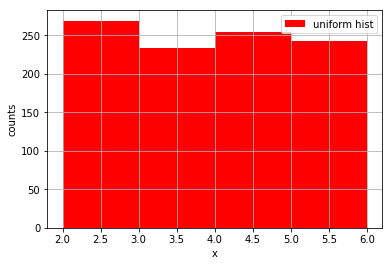

In [7]:
random.seed(42) # Setze einen Seed, um wiederholbare Ergebnisse zu erhalten
uniformArrayBasic = random.uniform(size = 1000) # Das ist die ursprüngliche gleichverteilte Sample, aus der wir alles generieren
# Die generierten Zahlen sind reell, gleichverteilt und zwischen 0 und 1
# Setze die Grenzen des neuen Intervalls
x_min = 2 
x_max = 6
uniformArbitraryInterval = uniformTransform(uniformArrayBasic, x_min, x_max) # Transformiere das Sample auf das neue Intervall
plt.hist(uniformArbitraryInterval, bins=np.arange(start=x_min, stop=x_max + 1, step=1),
         histtype='bar', label='uniform hist', color='r')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('counts')
plt.show()

## Teilaufgabe b)
Wieder sind gleichverteilte Zufallszahlen im Intervall von 0 bis 1 gegeben. Diesmal soll daraus eine Verteilung mit der Wahrscheinlichkeitsdichtefunktion (PDF) $f(t)=N \, \exp(-t/\tau)$ im Bereich von 0 bis unendlich generiert werden. Die Normierungskonstante $N$ berechnet sich hier zu $1/\tau$, da das besimmte Integral von $f$ über den Definitionsbereich $\tau$ ergibt. Die kumulative Veteilungsfunktion (CDF) berechnet sich zu
$$\begin{align}
F(x) &= \int_{t_\text{min}}^t \mathrm{d}t' \, f(t') \\
     &= \frac{1}{\tau} \int_0^t \mathrm{d}t' \, \exp(-t/\tau) \\
     &= \frac{1}{\tau} [-\tau \exp(-t/\tau)]_0^t = 1 - \exp(-t/\tau)\,.
\end{align}
$$
Wir wollen die exponentialverteilten Zufallszahlen mithilfe der Inversionsmethode berechnen. Dazu muss die Inverse der CDF berechnet werden. Dafür wird $F(x)=y$ gesetzt und nach $x$ umgestellt. Dann wird $x$ umbenannt und mit der inversen CDF identifiziert. Für sie folgt
$$\begin{equation}
F^{-1}(t) = - \tau \,\text{ln}\lvert 1 - t \rvert\,.
\end{equation}$$
Es folgt nun, dass die Anwendung von $F^{-1}$ auf ein Sample gleichverteilter Zufallszahlen im Intervall von 0 bis 1 exponentialverteilte Zufallszahlen in den positiven reellen Zahlen liefert, da das Intervall mittransformiert wird.
Die Implementation folgt. In das Histogramm ist auch die PDF eingefügt, sodass ersichtlicherweise exponentiell verteilte Zahlen erzeugt wurden.

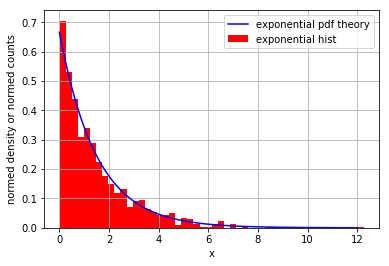

In [8]:
tau = 1.5
x_lin = np.linspace(0, 8*tau, 1000)
exponentialDistribution = - tau * np.log(np.abs(1 - uniformArrayBasic))
plt.hist(exponentialDistribution, bins=50, normed=True,
         histtype='bar', label='exponential hist', color='r')
plt.plot(x_lin, np.exp(-x_lin/tau)/tau, 'b-', label='exponential pdf theory')

#plt.plot(x_lin, 1-np.exp(-x_lin/tau), 'g-', label='exponential cdf theory')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('normed density or normed counts')
plt.show()

## Teilaufgabe c)
Nun wollen wir potenzverteilte Zufallszahlen im Bereich von $x_\text{min}$ bis $x_\text{max}$ generieren. Die Verteilung soll der PDF
$$\begin{equation}
f(x) = N x^{-n}
\end{equation}
$$
folgen. Die Potenz $n$ soll größer als zwei sein. Die Normierungskonstante der Verteilungsfunktion ergibt sich zu
$$\begin{equation}
N = -\frac{1}{n+1}\frac{1}{x_\text{max}^{1-n} - x_\text{min}^{1-n}}\,.
\end{equation}
$$
Die CDF ist nach Integration von $x_\text{min}$ bis $x$
$$\begin{equation}
F(x) = \frac{x^{1-n}-x_\text{min}^{1-n}}{x_\text{max}^{1-n} - x_\text{min}^{1-n}}\,.
\end{equation}
$$
Diese Funktion kann invertiert werden, ihre Umkehrfunktion ist durch
$$\begin{equation}
F^{-1}(x) = \left(({x_\text{max}^{1-n} - x_\text{min}^{1-n}})x + x_\text{min}^{1-n}\right)^{\frac{1}{1-n}}
\end{equation}
$$
gegeben. Das Anwenden dieser Funktion auf gleichverteilte Zufallszahlen aus dem Intervall von 0 bis 1 ergibt dann eine 

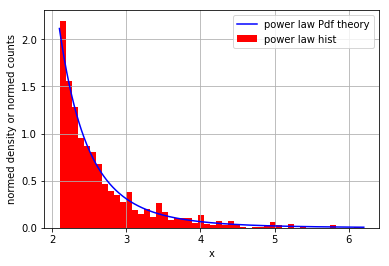

In [9]:
plt.clf()
n = 5.4
x_min = 2.1
x_max = 6.2
x_lin = np.linspace(x_min, x_max, 1000)
N = 1/integrate.quad(func, x_min, x_max)[0]
powerLawDistribution = ((1-n)/N*uniformArrayBasic + x_min**(-n+1))**(1/(-n+1)) # analytic normalization also possible, just technicalities
plt.hist(powerLawDistribution, bins=50, normed=True,
         histtype='bar', label='power law hist', color='r')
plt.plot(x_lin, powerLawPdf(x_lin,x_min,x_max), 'b-', label='power law Pdf theory')
#plt.plot(x_lin, powerLawCdf(x_lin,x_min,x_max) , 'g-', label='power law Cdf theory')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('normed density or normed counts')
plt.show()

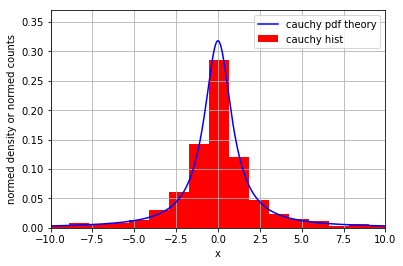

In [10]:
plt.clf()
x_lin = np.linspace(-100, 100, 10000)
cauchyDistribution = np.tan(np.pi*(uniformArrayBasic-1/2))
plt.hist(cauchyDistribution, bins=1000, normed=True,
         histtype='bar', label='cauchy hist', color='r')
plt.plot(x_lin, cauchyPdf(x_lin), 'b-', label='cauchy pdf theory')
#plt.plot(x_lin, powerLawCdf(x_lin,x_min,x_max) , 'g-', label='power law Cdf theory')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('normed density or normed counts')
plt.axis((-10,10,0,0.37))
plt.show()

## Teilaufgabe d)

In [95]:
def empiricalRandomNumberGenerator(maxValue, ourBins):
    x = random.uniform()
    y = random.uniform() * maxValue
    Bin = np.digitize(x, ourBins) # return the bin number of the x-value.
    #Starts at 1, so keep in mind we need to substract 1 later to index correctly
    countsAtBin = counts[Bin - 1]
    if y < countsAtBin:
        return x
    else:
        return None

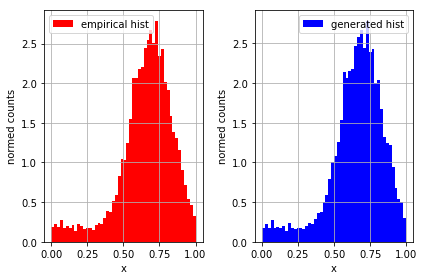

In [106]:
plt.clf()
givenData = np.genfromtxt('empirisches_histogramm.csv', delimiter=',')
givenData = np.delete(givenData,0,axis=0) # Delete the nans
binmids, counts = zip(*givenData) # now we got 2 arrays with binminds and counts!
ourBins = np.arange(start=0, stop=1.02, step=0.02)
maxValue = np.amax(counts)
generatedData = []
for i in range(0,100000):
    generatedEmpiricalRandomNumber = empiricalRandomNumberGenerator(maxValue, ourBins)
    if generatedEmpiricalRandomNumber != None:
        generatedData.append(generatedEmpiricalRandomNumber)
plt.subplot(1,2,1)
plt.hist(binmids, bins=ourBins, normed=True, weights = counts, histtype='bar', label='empirical hist', color='r')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('normed counts')
plt.subplot(1,2,2)
plt.hist(generatedData, bins=ourBins, normed=True, histtype='bar', label='generated hist', color='b')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('normed counts')
plt.tight_layout()
plt.show()